In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PMF import PMF
from scipy import stats

In [2]:
df = pd.read_table("~/Projects/HW_ML/data/data-filtering/user_artists.dat")
df.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


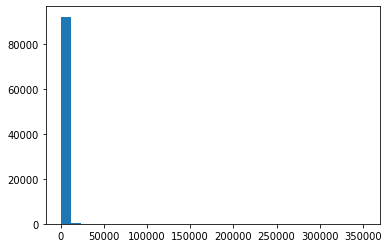

In [8]:
d = plt.hist(df['weight'],bins=30)
plt.show()

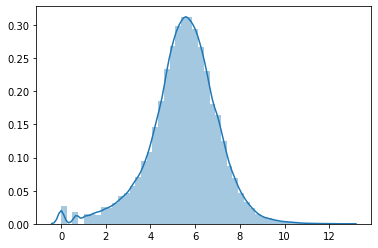

In [9]:
l = df['weight']
s = np.log(np.array(l))
sns.distplot(s)

seems like I've spotted a log-normal distribution.
let's check it with
2-sided chi squared test

In [10]:
# s = np.sort(s,axis=0)
t = (s-s.mean())/s.var()
st, p = stats.normaltest(t)
print(st,p,sep='\n')

6148.504596477302
0.0


In [13]:
wht = list(t)
wht.sort()
for w in wht:
    if w<2:
        del w
    else:
        break
wht = np.array(wht)

st, p = stats.normaltest(wht)
print(st,p,sep='\n')

6148.504596477302
0.0


In [14]:
st, p = stats.shapiro(t)
print(st, p, sep='\n')

0.9772776961326599
0.0


/home/olga/Projects/CPI/venv/lib/python3.6/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [15]:
l = l.sort_values()
print(l.median(), l.mean(), l.std(),sep='\n')

260.0
745.2439300256372
3751.3220803876848


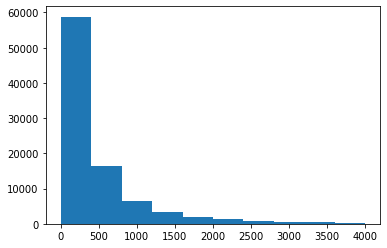

In [16]:
g = l[abs(l-l.median())<l.std()]
d=plt.hist(g)
plt.show()

# Approach 1. Work with rounded ln(X)

In [3]:
N, M = 1832, 17632
N1 = df['userID'].max()
M1 = df['artistID'].max()

X=np.zeros((N1, M1))
for _, row in df.iterrows():
    X[row['userID']-1, row['artistID']-1] = np.round(np.log(row['weight']))

## the matrix at a glance

In [ ]:
X.max()

In [19]:
Y = X.copy()
Y[Y > 0] = 1
print(f"{Y.sum()} / {N*M} = {Y.sum() / (N*M) :.5f}")

92198.0 / 32301824 = 0.00285


## train_test_split & save it

In [4]:
# X[:20, 40:60] - validation set
Y = []
for i in range(20):
    for j in range(40, 60):
        if X[i,j] > 0:
            Y.append((i,j,X[i,j]))

# Y = np.array(Y)
X[:20, 40:60] = np.zeros(X[:20, 40:60].shape)

# np.save('/home/olga/Projects/HW_ML/lab4/experiment/x.npy', X)
# np.save('/home/olga/Projects/HW_ML/lab4/experiment/y.npy', np.array(Y))

In [20]:
# this is the pretraining in 2 epochs described briefly

# U, V = PMF(X, d=10, l=2, s=1, max_iter=2, print_cost=1)

# np.save('/home/olga/Projects/HW_ML/lab4/experiment/u.npy', U)
# np.save('/home/olga/Projects/HW_ML/lab4/experiment/v.npy', V)

In [5]:
def test(u, v, y):
    X_hat = u.T @ v

    print("pred vs true")
    for i, j, x_true in y:
        print(f"{X_hat[i,j]:.2f}    {x_true}")


In [23]:
# 3-rd epoch
U, V = PMF(X, d=10, l=2, s=1, max_iter=1, print_cost=1,
           pretrained_u=U, pretrained_v=V)

In [26]:
test(U, V, Y)

pred vs true
7.67    10.0
5.30    9.0
6.20    9.0
5.79    9.0
4.62    9.0
5.77    9.0
5.15    9.0
5.85    8.0
6.62    8.0
2.24    8.0
6.39    5.0
5.48    7.0
4.85    5.0
7.01    8.0
1.46    2.0
3.72    5.0
5.04    5.0
3.72    5.0


In [27]:
# 4-th epoch
U, V = PMF(X, d=10, l=2, s=1, max_iter=1, print_cost=1,
           pretrained_u=U, pretrained_v=V)
test(U, V, Y)



1 iteration cost: 12.00085
pred vs true
8.20    10.0
6.02    9.0
6.89    9.0
6.47    9.0
6.76    9.0
6.79    9.0
5.85    9.0
6.82    8.0
7.10    8.0
2.76    8.0
6.59    5.0
5.62    7.0
4.98    5.0
7.14    8.0
1.50    2.0
4.27    5.0
5.39    5.0
5.25    5.0


In [6]:
# 5-th epoch
U = np.load('/home/olga/Projects/HW_ML/lab4/experiment/u.npy')
V = np.load('/home/olga/Projects/HW_ML/lab4/experiment/v.npy')
U, V = PMF(X, d=10, l=2, s=1, max_iter=1, print_cost=1,
           pretrained_u=U, pretrained_v=V)
test(U, V, Y)

1 iteration cost: 11.90382
pred vs true
8.41    10.0
6.35    9.0
7.16    9.0
6.77    9.0
7.82    9.0
7.21    9.0
6.18    9.0
7.23    8.0
7.29    8.0
3.05    8.0
6.67    5.0
5.70    7.0
5.04    5.0
7.22    8.0
1.52    2.0
4.60    5.0
5.53    5.0
5.66    5.0
